In [4]:
import pandas as pd 
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
ex2data1 = "C:/Anaconda3/Notebooks/machine-learning-demo/courseraML/ex2/data/ex2data1.data"

In [6]:
data = pd.read_csv(ex2data1,sep=",",names=['test1','test2','result'],header=0)

In [7]:
data.head(5)

,test1,test2,result
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [8]:
X = data.loc[0:,['test1','test2']]
y = data.loc[0:,['result']]
m = y.size # number of training examples

In [9]:
X.shape, y.shape

((99, 2), (99, 1))

In [10]:
posDf = data[data.result ==1]
negDf = data[data.result ==0]

In [11]:
posDf.shape

(60, 3)

In [12]:
pos = np.matrix(posDf)
neg = np.matrix(negDf)

In [13]:
posDf.head(5)

,test1,test2,result
2,60.182599,86.308552,1
3,79.032736,75.344376,1
5,61.106665,96.511426,1
6,75.024746,46.554014,1
7,76.098787,87.420570,1


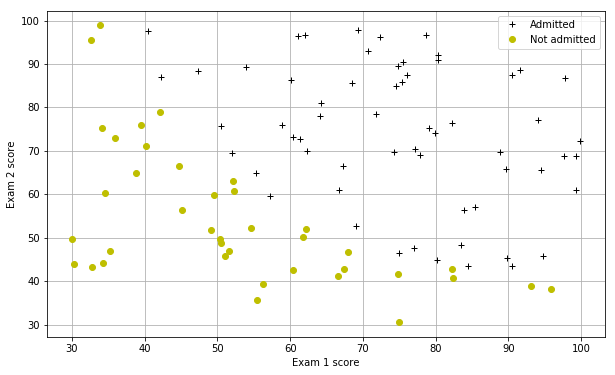

In [14]:
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,0],pos[:,1],'k+',label='Admitted')
    plt.plot(neg[:,0],neg[:,1],'yo',label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
    
plotData()

In [15]:
from scipy.special import expit #Vectorized sigmoid function

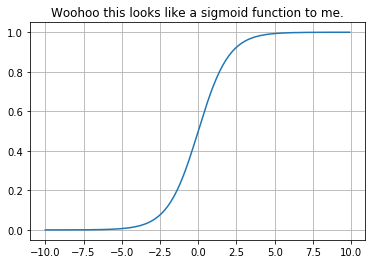

In [16]:
#Quick check that expit is what I think it is
myx = np.arange(-10,10,.1)
plt.plot(myx,expit(myx))
plt.title("Woohoo this looks like a sigmoid function to me.")
plt.grid(True)


In [22]:
#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))

#Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    Note this includes regularization, if you set mylambda to nonzero
    For the first part of the homework, the default 0. is used for mylambda
    """
    #note to self: *.shape is (rows, columns)
    #print(mytheta.shape) 
    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [42]:
#Get the matrix from dataframe using numpy
features = np.matrix(X)
labels = np.matrix(y,dtype=float)

In [43]:
bias = np.ones((features.shape[0],1))
features =  np.append(bias, features,axis=1)
features[0]

matrix([[  1.        ,  30.28671077,  43.89499752]])

In [44]:
features.shape, labels.shape

((99, 3), (99, 1))

In [45]:
#Check that with theta as zeros, cost returns about 0.693:
initial_theta = np.zeros((features.shape[1],1))
print(initial_theta)
computeCost(initial_theta,features,y)

[[ 0.]
 [ 0.]
 [ 0.]]


0.6931471805599454

In [48]:
#An alternative to OCTAVE's 'fminunc' we'll use some scipy.optimize function, "fmin"
#Note "fmin" does not need to be told explicitly the derivative terms
#It only needs the cost function, and it minimizes with the "downhill simplex algorithm."
#http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.fmin.html
from scipy import optimize

def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy, mylambda), maxiter=4000, full_output=True)
    return result[0], result[1]

In [57]:
features = np.squeeze(np.asarray(features))
labels = np.squeeze(np.asarray(labels))

In [62]:
#initial_theta = np.zeros((features.shape[1],1))
initial_theta = np.zeros((features.shape[1],1))

theta, mincost = optimizeTheta(initial_theta,features,labels)
#That's pretty cool. Black boxes ftw


Optimization terminated successfully.
         Current function value: 0.204557
         Iterations: 183
         Function evaluations: 318


In [63]:
#"Call your costFunction function using the optimal parameters of θ. 
#You should see that the cost is about 0.203."
print (computeCost(theta.reshape(3,1),features,labels))

0.2045573966024971


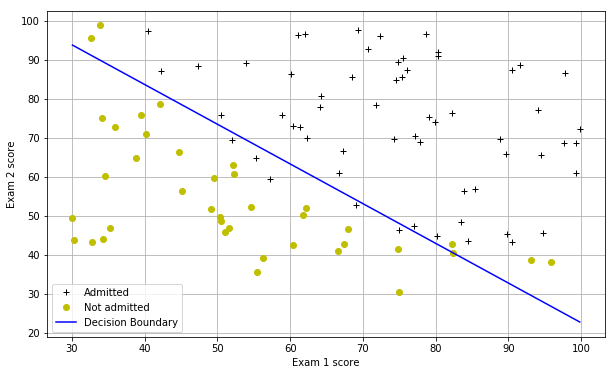

In [64]:
#Plotting the decision boundary: two points, draw a line between
#Decision boundary occurs when h = 0, or when
#theta0 + theta1*x1 + theta2*x2 = 0
#y=mx+b is replaced by x2 = (-1/thetheta2)(theta0 + theta1*x1)

boundary_xs = np.array([np.min(features[:,1]), np.max(features[:,1])])
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*boundary_xs)
plotData()
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()

In [66]:
#For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
#you should expect to see an admission probability of 0.776.
print (h(theta,np.array([1, 45.,85.])))

0.781119209572


In [86]:
pos = posDf.loc[0:,['test1','test2']]
pos = np.matrix(pos)
bias = np.ones((pos.shape[0],1))
pos =  np.append(bias, pos,axis=1)

neg = negDf.loc[0:,['test1','test2']]
neg = np.matrix(neg)
bias = np.ones((neg.shape[0],1))
neg =  np.append(bias, neg,axis=1)


In [87]:
def makePrediction(mytheta, myx):
    return h(mytheta,myx) >= 0.5

#Compute the percentage of samples I got correct:
pos_correct = float(np.sum(makePrediction(theta,pos)))
print(pos_correct)
neg_correct = float(np.sum(np.invert(makePrediction(theta,neg))))
print(neg_correct)
tot = len(pos)+len(neg)
print(tot)
prcnt_correct = float(pos_correct+neg_correct)/tot
print ("Fraction of training samples correctly predicted: %f." % prcnt_correct)

55.0
33.0
99
Fraction of training samples correctly predicted: 0.888889.


<h1>Anser to question 2 -Regularization </h1>

In [88]:
datafile = 'data/ex2data2.data'
#!head $datafile
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
##Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
##Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

In [89]:
#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
#Check to make sure I included all entries
#print "Included everything? ",(len(pos)+len(neg) == X.shape[0])

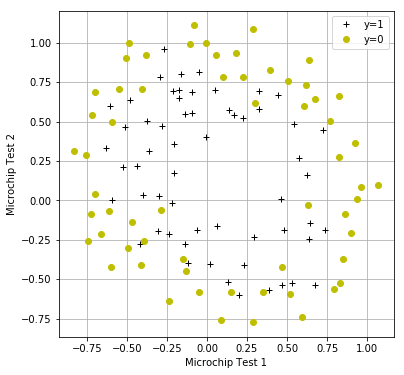

In [90]:

def plotData():
    plt.plot(pos[:,1],pos[:,2],'k+',label='y=1')
    plt.plot(neg[:,1],neg[:,2],'yo',label='y=0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)

#Draw it square to emphasize circular features
plt.figure(figsize=(6,6))
plotData()

In [91]:
#This code I took from someone else (the OCTAVE equivalent was provided in the HW)
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [92]:

#Create feature-mapped X matrix
mappedX = mapFeature(X[:,1],X[:,2])

In [109]:
mappedX.shape

(118, 28)

In [94]:
#Cost function is the same as the one implemented above, as I included the regularization
#toggled off for default function call (lambda = 0)
#I do not need separate implementation of the derivative term of the cost function
#Because the scipy optimization function I'm using only needs the cost function itself
#Let's check that the cost function returns a cost of 0.693 with zeros for initial theta,
#and regularized x values
initial_theta = np.zeros((mappedX.shape[1],1))
computeCost(initial_theta,mappedX,y)

0.6931471805599453

<h2>Learning with fminunc</h2>

In [95]:

#I noticed that fmin wasn't converging (passing max # of iterations)
#so let's use minimize instead

def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
theta, mincost = optimizeRegularizedTheta(initial_theta,mappedX,y)

In [107]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,mylambda)
    xvals = np.linspace(-1,1.5,50)
    #print(xvals)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

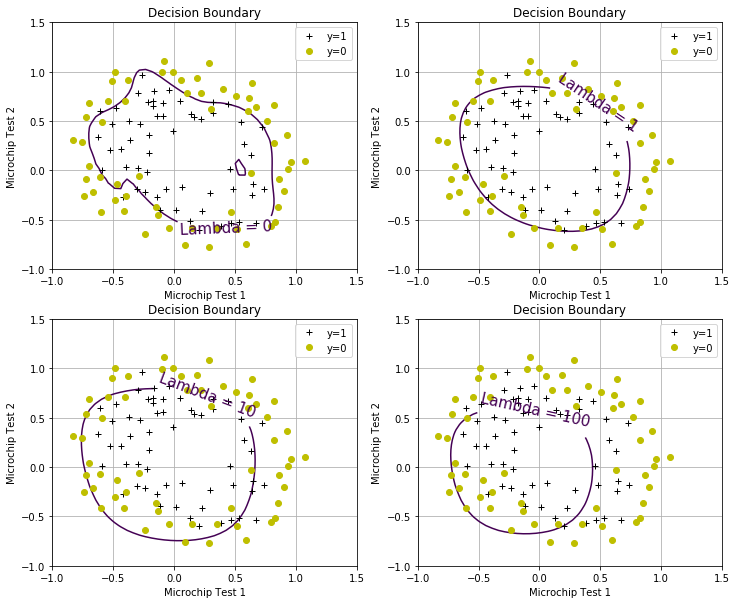

In [108]:
#Build a figure showing contours for various values of regularization parameter, lambda
#It shows for lambda=0 we are overfitting, and for lambda=100 we are underfitting
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData()
plotBoundary(theta,mappedX,y,0.)

plt.subplot(222)
plotData()
plotBoundary(theta,mappedX,y,1.)

plt.subplot(223)
plotData()
plotBoundary(theta,mappedX,y,10.)

plt.subplot(224)
plotData()
plotBoundary(theta,mappedX,y,100.)